In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/iris-flower-dataset/IRIS.csv


In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# load dataset
filename = "/kaggle/input/iris-flower-dataset/IRIS.csv"
data = read_csv(filename)
print(data.head(60))

    sepal_length  sepal_width  petal_length  petal_width          species
0            5.1          3.5           1.4          0.2      Iris-setosa
1            4.9          3.0           1.4          0.2      Iris-setosa
2            4.7          3.2           1.3          0.2      Iris-setosa
3            4.6          3.1           1.5          0.2      Iris-setosa
4            5.0          3.6           1.4          0.2      Iris-setosa
5            5.4          3.9           1.7          0.4      Iris-setosa
6            4.6          3.4           1.4          0.3      Iris-setosa
7            5.0          3.4           1.5          0.2      Iris-setosa
8            4.4          2.9           1.4          0.2      Iris-setosa
9            4.9          3.1           1.5          0.1      Iris-setosa
10           5.4          3.7           1.5          0.2      Iris-setosa
11           4.8          3.4           1.6          0.2      Iris-setosa
12           4.8          3.0         

In [4]:
# shape of data
data.shape

(150, 5)

In [5]:
#data types of attributes
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [6]:
#number of observations for each class 
data.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [7]:
#statistical properties of attributes
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
#Correlations between each attribute
print(data.corr(method='pearson'))

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


In [9]:
#skweness of each attribute
data.skew()

sepal_length    0.314911
sepal_width     0.334053
petal_length   -0.274464
petal_width    -0.104997
dtype: float64

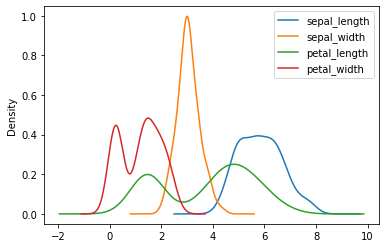

In [10]:
#data visualization using density plots
data.plot(kind='density', sharex=False)
plt.show()

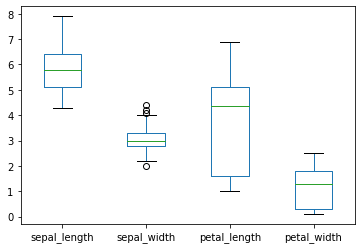

In [11]:
#data visualization using box and whisker plots
data.plot(kind='box', sharex=False, sharey=False)
plt.show()

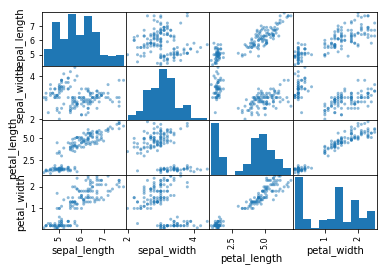

In [12]:
#Scactter Matrix 
scatter_matrix(data)
plt.show()

In [13]:
# Split data in inputs and labels
array = data.values
inputs = array[:, 0:-1]
labels = array[:, -1]

In [14]:
# Scores of features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
test = SelectKBest(score_func=chi2, k=3)
fit = test.fit(inputs, labels)
print(fit.scores_)

[ 10.81782088   3.59449902 116.16984746  67.24482759]


In [15]:
# Best 3 features
features = fit.transform(inputs)
print(features)

[[5.1 1.4 0.2]
 [4.9 1.4 0.2]
 [4.7 1.3 0.2]
 [4.6 1.5 0.2]
 [5.0 1.4 0.2]
 [5.4 1.7 0.4]
 [4.6 1.4 0.3]
 [5.0 1.5 0.2]
 [4.4 1.4 0.2]
 [4.9 1.5 0.1]
 [5.4 1.5 0.2]
 [4.8 1.6 0.2]
 [4.8 1.4 0.1]
 [4.3 1.1 0.1]
 [5.8 1.2 0.2]
 [5.7 1.5 0.4]
 [5.4 1.3 0.4]
 [5.1 1.4 0.3]
 [5.7 1.7 0.3]
 [5.1 1.5 0.3]
 [5.4 1.7 0.2]
 [5.1 1.5 0.4]
 [4.6 1.0 0.2]
 [5.1 1.7 0.5]
 [4.8 1.9 0.2]
 [5.0 1.6 0.2]
 [5.0 1.6 0.4]
 [5.2 1.5 0.2]
 [5.2 1.4 0.2]
 [4.7 1.6 0.2]
 [4.8 1.6 0.2]
 [5.4 1.5 0.4]
 [5.2 1.5 0.1]
 [5.5 1.4 0.2]
 [4.9 1.5 0.1]
 [5.0 1.2 0.2]
 [5.5 1.3 0.2]
 [4.9 1.5 0.1]
 [4.4 1.3 0.2]
 [5.1 1.5 0.2]
 [5.0 1.3 0.3]
 [4.5 1.3 0.3]
 [4.4 1.3 0.2]
 [5.0 1.6 0.6]
 [5.1 1.9 0.4]
 [4.8 1.4 0.3]
 [5.1 1.6 0.2]
 [4.6 1.4 0.2]
 [5.3 1.5 0.2]
 [5.0 1.4 0.2]
 [7.0 4.7 1.4]
 [6.4 4.5 1.5]
 [6.9 4.9 1.5]
 [5.5 4.0 1.3]
 [6.5 4.6 1.5]
 [5.7 4.5 1.3]
 [6.3 4.7 1.6]
 [4.9 3.3 1.0]
 [6.6 4.6 1.3]
 [5.2 3.9 1.4]
 [5.0 3.5 1.0]
 [5.9 4.2 1.5]
 [6.0 4.0 1.0]
 [6.1 4.7 1.4]
 [5.6 3.6 1.3]
 [6.7 4.4 1.4]
 [5.6 4.5 

In [16]:
# Rescale inputs
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_inputs = scaler.fit_transform(features)
print(rescaled_inputs[0:5, :])

[[0.22222222 0.06779661 0.04166667]
 [0.16666667 0.06779661 0.04166667]
 [0.11111111 0.05084746 0.04166667]
 [0.08333333 0.08474576 0.04166667]
 [0.19444444 0.06779661 0.04166667]]


In [17]:
# Standardize data to mean - 0 and std - 1
scaler = StandardScaler().fit(rescaled_inputs)
rescaled_inputs = scaler.transform(rescaled_inputs)
print(rescaled_inputs[0:5, :])

[[-0.90068117 -1.3412724  -1.31297673]
 [-1.14301691 -1.3412724  -1.31297673]
 [-1.38535265 -1.39813811 -1.31297673]
 [-1.50652052 -1.2844067  -1.31297673]
 [-1.02184904 -1.3412724  -1.31297673]]


In [18]:
# Split data into train and test sets
input_train, input_test, label_train, label_test = train_test_split(rescaled_inputs, labels, test_size=0.33, random_state=7, shuffle=True)

In [19]:
# train the model
model = LinearDiscriminantAnalysis()
clf = model.fit(input_train, label_train)
# Predictions using model
predictions = model.predict(input_test)
print(accuracy_score(label_test, predictions))

0.96


In [20]:
# Confusion Matrix
print(confusion_matrix(label_test, predictions))

[[14  0  0]
 [ 0 17  1]
 [ 0  1 17]]


In [21]:
#Classification Matrix
print(classification_report(label_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.94      0.94      0.94        18

       accuracy                           0.96        50
      macro avg       0.96      0.96      0.96        50
   weighted avg       0.96      0.96      0.96        50

